In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [10]:
# Clean data
df = df[
  (df["value"] >= df["value"].quantile(0.025)) &
  (df["value"] <= df["value"].quantile(0.975))]
df.head()

,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-29,27734
2016-06-30,26696
2016-07-01,28372


Text(0, 0.5, 'Page Views')

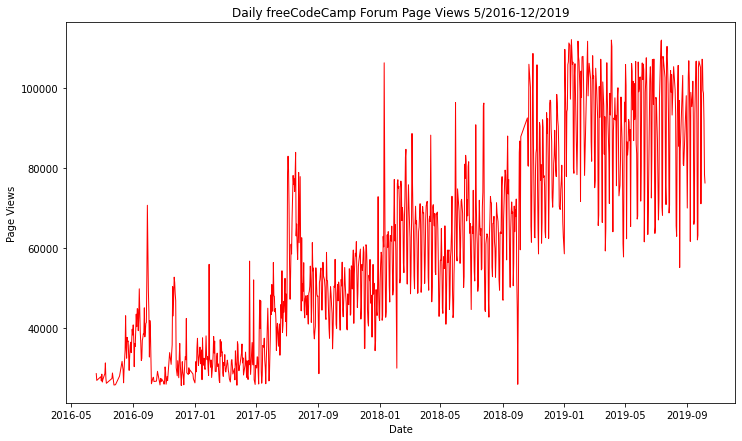

In [13]:
# Draw line plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(df.index, df['value'], 'r', linewidth=1)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')


In [18]:
# Copy and modify data for monthly bar plot
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean() 
df_bar = df_bar.unstack()
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,27435.750000,27478.818182,33844.739130,41476.866667,31461.000000,35353.956522,30245.285714
2017,32785.161290,31611.961538,30325.653846,32860.739130,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,52898.357143,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,68031.241379,63591.064516,62831.612903,65941.733333,79737.625000,78688.333333,80047.483871
2019,97748.208333,98236.166667,88080.107143,87929.413793,91439.903226,90435.642857,91609.040000,89286.000000,90410.538462,91980.000000,NaN,NaN


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

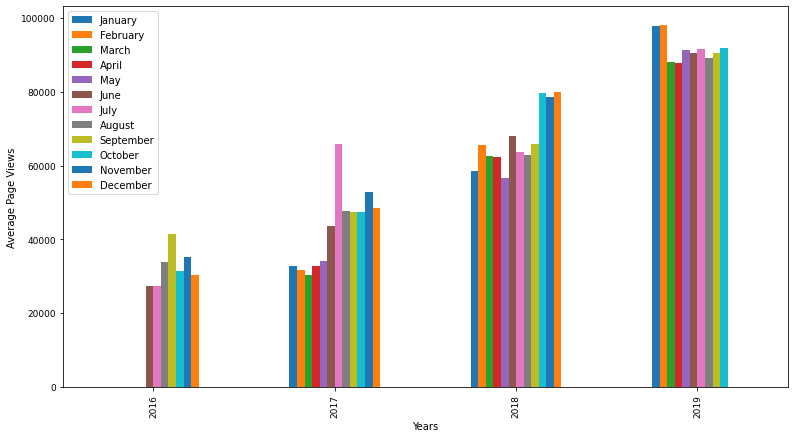

In [22]:
# Draw bar plot
fig = df_bar.plot.bar(legend = True, figsize=(13,7), ylabel = "Average Page Views", xlabel = "Years").figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=(9))
plt.yticks(fontsize=(9))

In [24]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,month,year
0,2016-06-20,28508,Jun,2016
1,2016-06-21,26805,Jun,2016
2,2016-06-29,27734,Jun,2016
3,2016-06-30,26696,Jun,2016
4,2016-07-01,28372,Jul,2016


Text(0, 0.5, 'Page Views')

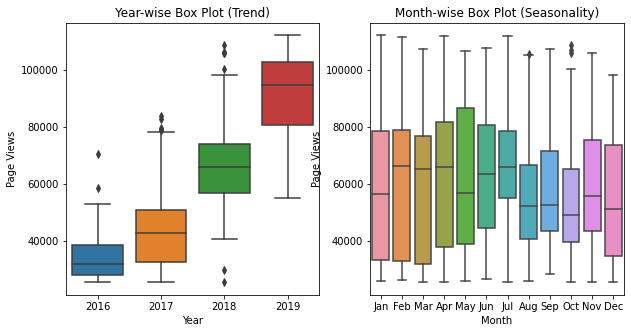

In [25]:
# Draw box plots (using Seaborn)
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0] = sns.boxplot(x=df_box["year"], y=df_box["value"], ax =axes[0])
axes[1] = sns.boxplot(x=df_box["month"], y=df_box["value"], ax =axes[1])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
axes[1].set_title("Month-wise Box Plot (Seasonality)") 
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")